In [2]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import random
import time
import numpy as np
import pandas as pd
import cv2

In [28]:
os.listdir("/kaggle/working")

['__notebook_source__.ipynb',
 '.virtual_documents',
 'state.db',
 'log_class_weights.csv',
 'log.csv',
 'Models_class_weights',
 'Models']

In [3]:
images_to_test_path = '/kaggle/input/100-bird-species/images to test'
test_path = '/kaggle/input/100-bird-species/test'
train_path ='/kaggle/input/100-bird-species/train'
validation_path = '/kaggle/input/100-bird-species/valid'

In [30]:
print(len(os.listdir(images_to_test_path)))
print(len(os.listdir(test_path)))
print(len(os.listdir(train_path)))
print(len(os.listdir(validation_path)))


5
450
450
450


In [31]:
def print_stats(path = '', verbose = False):
    sizes = []
    i = 0
    for filename in os.listdir(path):
        i+=1
        size = len(os.listdir(path + '/' + filename))
        sizes.append(size)
        if verbose == True :
            print(size , end = " ")
            if (i% 20 == 0):
                print()
    print()

    print("Max samples = {}".format(max(sizes)))
    print("Min samples = {}".format(min(sizes)))
    print("sum samples = {}".format(sum(sizes)))
    print("Average sample size = {}".format(np.mean(sizes)))
    print("Sample sizes standard deviation = {}".format(np.std(sizes)))

    return sizes
        

In [32]:
print('validation set stats :')
sizes = print_stats(validation_path)
print('\n*********************')
print('testing set stats :')
sizes = print_stats(test_path)


validation set stats :

Max samples = 5
Min samples = 5
sum samples = 2250
Average sample size = 5.0
Sample sizes standard deviation = 0.0

*********************
testing set stats :

Max samples = 5
Min samples = 5
sum samples = 2250
Average sample size = 5.0
Sample sizes standard deviation = 0.0


In [33]:
sizes = print_stats(train_path , verbose = True)


159 138 187 162 153 155 155 133 139 187 135 155 160 155 154 202 163 183 137 176 
194 152 158 136 165 151 179 161 154 135 153 161 200 135 155 155 153 154 132 136 
161 163 144 154 161 161 152 154 162 135 164 142 159 179 157 163 160 197 133 192 
157 131 155 160 156 165 141 139 184 137 168 156 143 132 169 164 138 140 159 135 
155 142 132 170 160 213 139 166 136 136 144 132 138 156 170 142 131 133 154 150 
184 165 217 176 233 152 134 154 154 172 157 157 154 175 150 152 248 130 158 158 
166 155 160 133 166 140 154 194 156 139 144 154 175 160 168 164 144 133 139 185 
154 130 160 151 155 162 163 130 154 167 154 190 154 144 169 165 149 152 138 150 
164 166 163 168 154 152 162 160 154 143 149 154 138 137 152 159 154 166 150 155 
163 136 175 154 166 186 138 162 144 164 167 155 152 154 150 167 132 159 154 132 
132 141 144 142 170 164 154 131 188 177 160 175 155 144 153 134 156 141 157 135 
154 164 155 150 140 153 144 165 188 180 136 151 160 166 173 155 163 177 157 163 
197 153 160 143 141 156 161 

In [34]:
df = pd.read_csv('/kaggle/input/100-bird-species/birds.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75126 entries, 0 to 75125
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   class id          75126 non-null  int64 
 1   filepaths         75126 non-null  object
 2   labels            75126 non-null  object
 3   scientific label  75126 non-null  object
 4   data set          75126 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [35]:
df.sample(frac = 1).head()

,class id,filepaths,labels,scientific label,data set
43550,278,train/IWI/044.jpg,IWI,Vestiaria coccinea.,train
68458,436,train/WATTLED LAPWING/070.jpg,WATTLED LAPWING,Vanellus indicus,train
30013,191,train/ENGGANO MYNA/106.jpg,ENGGANO MYNA,Gracula enganensis,train
72610,396,test/SORA/5.jpg,SORA,Porzana carolina,test
55429,353,train/RAINBOW LORIKEET/138.jpg,RAINBOW LORIKEET,Trichoglossus moluccanus,train


In [36]:
def display_samples(path = '', ncols = 1, nrows= 1 , verbose = False):
    
    
    imgs = []
    classes = random.sample(os.listdir(path), ncols * nrows)
    imgs_idx = [random.randint(0,len(os.listdir(path + '/'+ class_name))-1) 
            for class_name in classes]
    for i, img_idx in enumerate(imgs_idx):
        imgs.append(path + '/' + classes[i] + '/' +
                    os.listdir(path + '/' + classes[i])[img_idx])

    if verbose :    
        print(classes)
        print()
        print(imgs_idx)
        print()
        print(imgs)

    i = 0
    fig = plt.figure(figsize=(10, 10))
    # Adds a subplot at the 1st position
    for i in range(len(imgs)):
        fig.add_subplot(nrows, ncols, i + 1)
        img = cv2.imread(imgs[i])
    # showing image
        plt.imshow(img)
        plt.axis('off')
        plt.title(classes[i],fontsize = 10)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdcfcfa6b00> (for post_execute):


KeyboardInterrupt: 

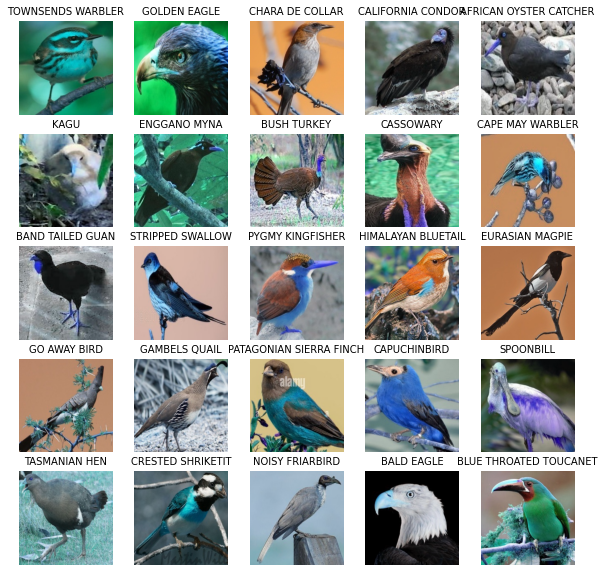

In [37]:
display_samples(train_path, 5 ,5)

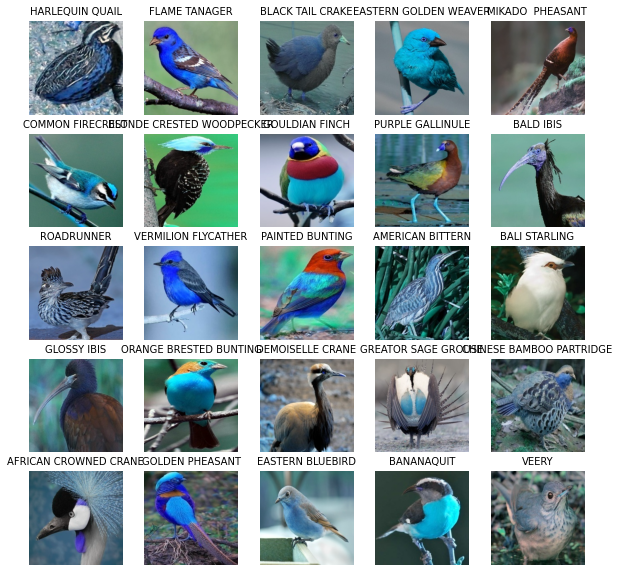

In [38]:
display_samples(test_path, 5 ,5)

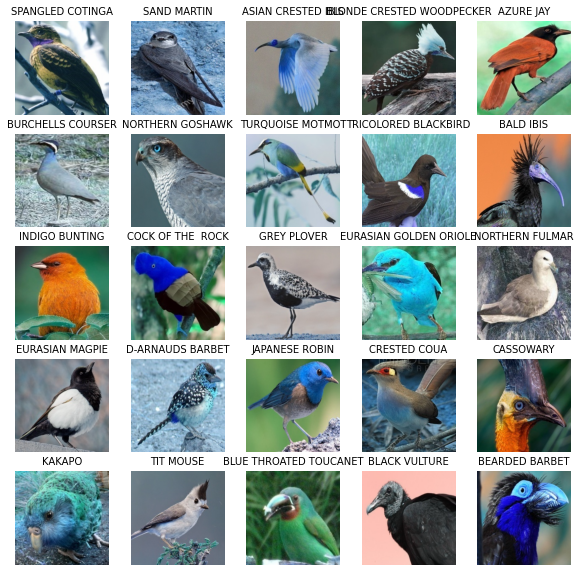

In [39]:
display_samples(validation_path, 5 ,5)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
train_datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        shear_range = 0.1,
        horizontal_flip=True,
        brightness_range=(0.9,1.1),
        rescale=1./255,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
BATCH = 64
train_augmented = train_datagen.flow_from_directory(
    directory = train_path,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=1,
    interpolation='nearest'
)

#print(train_augmented.class_indices)


Found 70626 images belonging to 450 classes.


In [7]:
test_augmented = test_datagen.flow_from_directory(
    directory = test_path,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=1,
    interpolation='nearest'
)



Found 2250 images belonging to 450 classes.


In [8]:
validation_augmented = validation_datagen.flow_from_directory(
    directory = validation_path,
    target_size=(150, 150),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=1,
    interpolation='nearest'
)



Found 2250 images belonging to 450 classes.


In [9]:
from sklearn.utils import class_weight



In [10]:
# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(train_augmented.classes),
    y = train_augmented.classes)
print(type(class_weights))
print(class_weights.shape)

<class 'numpy.ndarray'>
(450,)


In [11]:
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: 0.9454618473895582, 1: 0.8719259259259259, 2: 0.8767970204841713, 3: 1.145596107055961, 4: 1.0191341991341991, 5: 1.145596107055961, 6: 1.0125591397849463, 7: 0.8392869875222816, 8: 1.1800501253132831, 9: 0.974824016563147, 10: 0.9511919191919191, 11: 0.9454618473895582, 12: 1.0463111111111112, 13: 0.8767970204841713, 14: 0.9232156862745098, 15: 0.9933333333333333, 16: 0.9569918699186992, 17: 1.1800501253132831, 18: 1.0125591397849463, 19: 0.8767970204841713, 20: 1.1291127098321343, 21: 0.8392869875222816, 22: 1.1980661577608143, 23: 1.1712437810945273, 24: 1.0899074074074073, 25: 1.0191341991341991, 26: 1.0191341991341991, 27: 1.0463111111111112, 28: 1.1291127098321343, 29: 1.0463111111111112, 30: 1.1291127098321343, 31: 1.0191341991341991, 32: 1.0257952069716776, 33: 1.0125591397849463, 34: 0.834822695035461, 35: 0.9569918699186992, 36: 0.9996602972399151, 37: 1.1130969267139479, 38: 0.8392869875222816, 39: 1.0191341991341991, 40: 0.8260350877192982, 41: 0.9569918699186992, 42: 0

In [48]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mnet_base = MobileNetV2(input_shape = (150,150,3),
                       include_top = False,
                       weights = 'imagenet')

mnet_base.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [49]:
#mnet_base.summary()

In [50]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, GlobalAveragePooling2D, ReLU

In [51]:
inputs = Input(shape = (150,150,3))
x = mnet_base(inputs)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
x = Dense(2048)(x)

x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
x = Dense(900)(x)

x = BatchNormalization()(x)
x = ReLU()(x)
x = Dropout(0.25)(x)
outputs = Dense(450,activation = 'softmax')(x)

model = Model(inputs , outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1280)              5120      
_________________________________________________________________
re_lu (ReLU)                 (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              262348

In [52]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [53]:
models_path = '/kaggle/working/Models_class_weights'
#shutil.rmtree(models_path)
os.makedirs(models_path)

FileExistsError: [Errno 17] File exists: '/kaggle/working/Models_class_weights'

In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint, CSVLogger

checkpoint = ModelCheckpoint(filepath = models_path + '/checkpoint.hdf5',
    monitor = "val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    verbose=1,
    mode = 'max')

filename='log_class_weights.csv'
history_logger= CSVLogger(filename, separator=",", append=True)


callbacks = [checkpoint, history_logger]

In [ ]:
EPOCHS = 15
beg = int(time.time())

history = model.fit(
        train_augmented,
        steps_per_epoch = train_augmented.samples  // BATCH,
        epochs = EPOCHS,
        validation_data = validation_augmented,
        validation_steps = validation_augmented.samples // BATCH,
        class_weight = class_weight_dict,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/first_try_weights.h5')
model.save(models_path + '/first_try.h5')

In [ ]:
print(os.listdir("/kaggle/working/Models"))
scores = model.evaluate(test_augmented)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001 * 0.2),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()


In [ ]:
model.layers[1].trainable = True
for sub_layer in model.layers[1].layers[:-38]:
    sub_layer.trainable = False
    #print(sub_layer.name)

In [ ]:
model.summary()


In [ ]:
beg = int(time.time())

history = model.fit(
        train_augmented,
        steps_per_epoch = train_augmented.samples  // BATCH,
        epochs = EPOCHS,
        validation_data = validation_augmented,
        validation_steps = validation_augmented.samples // BATCH,
        class_weight = class_weight_dict,

        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/second_try_weights.h5')
model.save(models_path + '/second_try.h5')

In [ ]:
scores = model.evaluate(test_augmented)

In [ ]:
model.layers[1].trainable = True
for sub_layer in model.layers[1].layers[:-74]:
    sub_layer.trainable = False
    #print(sub_layer.name)

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001 * 0.2 * 0.2),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()


In [ ]:
beg = int(time.time())

history = model.fit(
        train_augmented,
        steps_per_epoch = train_augmented.samples  // BATCH,
        epochs = EPOCHS,
        validation_data = validation_augmented,
        validation_steps = validation_augmented.samples // BATCH,
        class_weight = class_weight_dict,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/3rd_try_weights.h5')
model.save(models_path + '/3rd_try.h5')

In [ ]:
scores = model.evaluate(test_augmented)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
from tensorflow.keras import Model
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/kaggle/working/Models_class_weights/3rd_try.h5')


In [ ]:
#scores3 = model.evaluate(test_augmented)
model.load_weights('/kaggle/working/Models_class_weights/3rd_try_weights.h5')
scores_3 = model.evaluate(test_augmented)
model.load_weights('/kaggle/working/Models_class_weights/checkpoint.hdf5')
scores_3best = model.evaluate(test_augmented)


In [19]:
from tensorflow.keras.optimizers import Adam

In [20]:
model.compile(optimizer = Adam(learning_rate = 0.001 * 0.2 * 0.2),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [21]:
from tensorflow.keras.callbacks import  EarlyStopping, ModelCheckpoint, CSVLogger, ReduceLROnPlateau


models_path = "/kaggle/working/Models_class_weights"
checkpoint = ModelCheckpoint(filepath = models_path + '/checkpoint.hdf5',
    monitor = "val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    verbose=1,
    mode = 'max')

filename='log_class_weights.csv'
history_logger= CSVLogger(filename, separator=",", append=True)

reduce_lro = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.3,
    patience=3,
    verbose=1,
    mode='auto',

)

early_stop  = EarlyStopping(patience = 6)
callbacks = [checkpoint, history_logger, reduce_lro, early_stop]

In [22]:
beg = int(time.time())

history = model.fit(
        train_augmented,
        steps_per_epoch = train_augmented.samples  // BATCH,
        epochs = 20,
        validation_data = validation_augmented,
        validation_steps = validation_augmented.samples // BATCH,
        class_weight = class_weight_dict,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/final_try_weights.h5')
model.save(models_path + '/final_try.h5')

Epoch 1/20
1103/1103 [==============================] - 894s 808ms/step - loss: 0.2251 - accuracy: 0.9319 - val_loss: 0.2398 - val_accuracy: 0.9353

Epoch 00001: val_accuracy improved from -inf to 0.93527, saving model to /kaggle/working/Models_class_weights/checkpoint.hdf5
Epoch 2/20
1103/1103 [==============================] - 615s 557ms/step - loss: 0.2286 - accuracy: 0.9301 - val_loss: 0.2227 - val_accuracy: 0.9393

Epoch 00002: val_accuracy improved from 0.93527 to 0.93929, saving model to /kaggle/working/Models_class_weights/checkpoint.hdf5
Epoch 3/20
1103/1103 [==============================] - 619s 561ms/step - loss: 0.2224 - accuracy: 0.9319 - val_loss: 0.2256 - val_accuracy: 0.9384

Epoch 00003: val_accuracy did not improve from 0.93929
Epoch 4/20
1103/1103 [==============================] - 616s 559ms/step - loss: 0.2133 - accuracy: 0.9344 - val_loss: 0.2050 - val_accuracy: 0.9415

Epoch 00004: val_accuracy improved from 0.93929 to 0.94152, saving model to /kaggle/working/Mo

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [13]:
model = load_model('/kaggle/working/Models_class_weights/final_try.h5')


2023-01-19 20:16:47.487545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 20:16:47.596779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 20:16:47.597931: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-19 20:16:47.600077: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [23]:
scores = model.evaluate(test_augmented)

36/36 [==============================] - 7s 208ms/step - loss: 0.1276 - accuracy: 0.9609


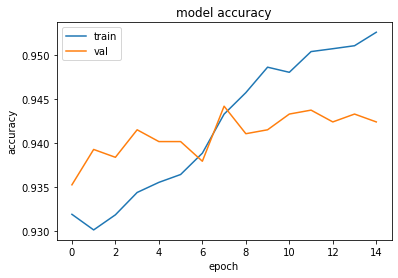

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()